In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

c_green = '#6DF10C'
c_yellow = '#F5DD0D'
c_cyan = '#0FFDEF'
c_blue = '#0141DE'
c_blue_light =  '#2775FD'
c_purple = '#FF0DE5'
c_green_dark = '#1BB200'
e = np.e

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost 
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

## Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Note: This dataset is particularly well suited for visualizations, clustering, and general EDA. Show off your skills!

Files
train.csv - the training dataset; NObeyesdad is the categorical target 

test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row

sample_submission.csv - a sample submission file in the correct format

In [3]:
train_df = pd.read_csv('csv\\train.csv')
test_df = pd.read_csv('csv\\test.csv')
original_df = pd.read_csv('csv\\ObesityDataSet.csv')
sample_df = pd.read_csv('csv\\sample_submission.csv')

In [4]:

train_df = pd.concat([train_df, original_df], ignore_index=True)
train_data = train_df.drop_duplicates()

In [5]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
22865,NaN,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
22866,NaN,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
22867,NaN,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
train_df.shape

(22869, 18)

In [7]:
columns = train_df.columns
columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   Gender                          22869 non-null  object 
 2   Age                             22869 non-null  float64
 3   Height                          22869 non-null  float64
 4   Weight                          22869 non-null  float64
 5   family_history_with_overweight  22869 non-null  object 
 6   FAVC                            22869 non-null  object 
 7   FCVC                            22869 non-null  float64
 8   NCP                             22869 non-null  float64
 9   CAEC                            22869 non-null  object 
 10  SMOKE                           22869 non-null  object 
 11  CH2O                            22869 non-null  float64
 12  SCC                             

In [9]:
train_df.isna().sum()

id                                2111
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

In [10]:
test_df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [11]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000,22869.000000
mean,10378.50000,23.885263,1.700377,87.767610,2.443428,2.754344,2.027442,0.984382,0.620551
std,5992.46278,5.753419,0.087881,26.364243,0.533329,0.712711,0.608901,0.839466,0.602850
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631662,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,10378.50000,22.815416,1.700000,84.000000,2.392665,3.000000,2.000000,1.000000,0.579541
75%,15567.75000,26.000000,1.763029,111.531208,3.000000,3.000000,2.535127,1.596576,1.000000
max,20757.00000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
test_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [14]:
input_cols = ['id','Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',]
target_col = 'NObeyesdad'

In [15]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()

In [16]:
train_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
22865,NaN,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
22866,NaN,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
22867,NaN,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [17]:
test_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [18]:
train_targets

0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
22864       Obesity_Type_III
22865       Obesity_Type_III
22866       Obesity_Type_III
22867       Obesity_Type_III
22868       Obesity_Type_III
Name: NObeyesdad, Length: 22869, dtype: object

In [19]:
train_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,20.976842,1.710730,131.408528,yes,yes,3.000000,3.000000,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
22865,NaN,Female,21.982942,1.748584,133.742943,yes,yes,3.000000,3.000000,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
22866,NaN,Female,22.524036,1.752206,133.689352,yes,yes,3.000000,3.000000,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
22867,NaN,Female,24.361936,1.739450,133.346641,yes,yes,3.000000,3.000000,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [20]:
columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [21]:
numeric_cols = ['id','Age','Height', 'Weight', 
                'FCVC', 'NCP', 'CH2O',
        'FAF', 'TUE',]

cat_cols = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
train_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.731967,Male,0.096944,-0.004315,-0.231290,yes,yes,-0.831454,0.321249,Sometimes,no,1.208977,no,-1.172655,0.590412,Sometimes,Public_Transportation
1,-1.731800,Female,-1.022938,-1.597389,-1.167046,yes,yes,-0.831454,0.344685,Frequently,no,-0.045069,no,0.018605,0.629439,no,Automobile
2,-1.731634,Female,-1.022938,0.126115,-1.426276,yes,yes,-1.055460,-1.883916,Sometimes,no,-0.192259,no,-0.140970,1.746797,no,Public_Transportation
3,-1.731467,Female,-0.509713,0.117808,1.650273,yes,yes,1.043604,0.344685,Sometimes,no,-0.580372,no,0.575951,0.264828,Sometimes,Public_Transportation
4,-1.731300,Male,1.348066,2.432987,0.228741,yes,yes,0.442955,-1.098466,Sometimes,no,-0.078166,no,1.171712,0.516176,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,-0.505523,0.117808,1.655343,yes,yes,1.043604,0.344685,Sometimes,no,-0.491558,no,0.824217,0.473920,Sometimes,Public_Transportation
22865,NaN,Female,-0.330649,0.548558,1.743890,yes,yes,1.043604,0.344685,Sometimes,no,-0.036644,no,0.425289,-0.035301,Sometimes,Public_Transportation
22866,NaN,Female,-0.236600,0.589774,1.741857,yes,yes,1.043604,0.344685,Sometimes,no,0.043934,no,0.512035,0.042693,Sometimes,Public_Transportation
22867,NaN,Female,0.082852,0.444620,1.728858,yes,yes,1.043604,0.344685,Sometimes,no,1.354761,no,0.184318,-0.057256,Sometimes,Public_Transportation


In [24]:
test_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1.732134,Male,0.523982,1.683185,1.247041,yes,yes,0.928505,0.344685,Sometimes,no,1.310894,no,-0.153651,-1.029385,Sometimes,Public_Transportation
1,1.732301,Female,-0.501498,-1.142218,-0.825667,yes,yes,-0.831454,-2.461561,Sometimes,no,1.597271,no,0.018605,-1.029385,Sometimes,Public_Transportation
2,1.732468,Female,0.367570,-0.648870,0.904007,yes,yes,1.043604,0.344685,Sometimes,no,0.976264,no,-1.172655,-0.613846,Sometimes,Public_Transportation
3,1.732635,Male,-0.505104,-1.675599,0.603160,yes,yes,-0.831454,0.313689,Sometimes,no,1.246495,no,-1.059662,-1.029385,Sometimes,Public_Transportation
4,1.732802,Female,0.367570,-0.830472,0.647396,yes,yes,1.043604,0.344685,Sometimes,no,1.028251,no,-1.172655,0.199918,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,4.040923,Male,-0.096888,0.239042,-0.369343,yes,no,0.693407,0.344685,Sometimes,no,-1.687410,no,-0.211218,0.262229,Sometimes,Public_Transportation
13836,4.041090,Female,0.889010,-1.256011,-0.977391,no,yes,1.043604,0.344685,Sometimes,no,-0.045069,no,-1.172655,-1.029385,Sometimes,Public_Transportation
13837,4.041257,Female,-0.165062,-1.306683,-1.645863,no,yes,1.043604,-0.674347,Frequently,no,-0.045069,no,1.150111,0.629439,Sometimes,Public_Transportation
13838,4.041424,Male,-0.501498,-0.914633,-1.318770,yes,yes,-0.831454,0.344685,Sometimes,no,-0.045069,no,2.401124,2.288264,no,Public_Transportation


## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(train_inputs[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_targets = train_df['NObeyesdad']
train_targets= labelencoder.fit_transform(train_targets)

train_targets

array([6, 1, 0, ..., 4, 4, 4])

In [27]:
label_text = labelencoder.classes_
label_text

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [28]:
train_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.731967,Male,0.096944,-0.004315,-0.231290,yes,yes,-0.831454,0.321249,Sometimes,no,1.208977,no,-1.172655,0.590412,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.731800,Female,-1.022938,-1.597389,-1.167046,yes,yes,-0.831454,0.344685,Frequently,no,-0.045069,no,0.018605,0.629439,no,Automobile,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.731634,Female,-1.022938,0.126115,-1.426276,yes,yes,-1.055460,-1.883916,Sometimes,no,-0.192259,no,-0.140970,1.746797,no,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.731467,Female,-0.509713,0.117808,1.650273,yes,yes,1.043604,0.344685,Sometimes,no,-0.580372,no,0.575951,0.264828,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.731300,Male,1.348066,2.432987,0.228741,yes,yes,0.442955,-1.098466,Sometimes,no,-0.078166,no,1.171712,0.516176,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,Female,-0.505523,0.117808,1.655343,yes,yes,1.043604,0.344685,Sometimes,no,-0.491558,no,0.824217,0.473920,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,NaN,Female,-0.330649,0.548558,1.743890,yes,yes,1.043604,0.344685,Sometimes,no,-0.036644,no,0.425289,-0.035301,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,NaN,Female,-0.236600,0.589774,1.741857,yes,yes,1.043604,0.344685,Sometimes,no,0.043934,no,0.512035,0.042693,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,NaN,Female,0.082852,0.444620,1.728858,yes,yes,1.043604,0.344685,Sometimes,no,1.354761,no,0.184318,-0.057256,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
test_inputs

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.732134,Male,0.523982,1.683185,1.247041,yes,yes,0.928505,0.344685,Sometimes,no,1.310894,no,-0.153651,-1.029385,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.732301,Female,-0.501498,-1.142218,-0.825667,yes,yes,-0.831454,-2.461561,Sometimes,no,1.597271,no,0.018605,-1.029385,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.732468,Female,0.367570,-0.648870,0.904007,yes,yes,1.043604,0.344685,Sometimes,no,0.976264,no,-1.172655,-0.613846,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.732635,Male,-0.505104,-1.675599,0.603160,yes,yes,-0.831454,0.313689,Sometimes,no,1.246495,no,-1.059662,-1.029385,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.732802,Female,0.367570,-0.830472,0.647396,yes,yes,1.043604,0.344685,Sometimes,no,1.028251,no,-1.172655,0.199918,Sometimes,Public_Transportation,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,4.040923,Male,-0.096888,0.239042,-0.369343,yes,no,0.693407,0.344685,Sometimes,no,-1.687410,no,-0.211218,0.262229,Sometimes,Public_Transportation,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13836,4.041090,Female,0.889010,-1.256011,-0.977391,no,yes,1.043604,0.344685,Sometimes,no,-0.045069,no,-1.172655,-1.029385,Sometimes,Public_Transportation,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13837,4.041257,Female,-0.165062,-1.306683,-1.645863,no,yes,1.043604,-0.674347,Frequently,no,-0.045069,no,1.150111,0.629439,Sometimes,Public_Transportation,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13838,4.041424,Male,-0.501498,-0.914633,-1.318770,yes,yes,-0.831454,0.344685,Sometimes,no,-0.045069,no,2.401124,2.288264,no,Public_Transportation,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X_train = train_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [31]:
X_train

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-1.731967,0.096944,-0.004315,-0.231290,-0.831454,0.321249,1.208977,-1.172655,0.590412,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.731800,-1.022938,-1.597389,-1.167046,-0.831454,0.344685,-0.045069,0.018605,0.629439,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.731634,-1.022938,0.126115,-1.426276,-1.055460,-1.883916,-0.192259,-0.140970,1.746797,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-1.731467,-0.509713,0.117808,1.650273,1.043604,0.344685,-0.580372,0.575951,0.264828,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.731300,1.348066,2.432987,0.228741,0.442955,-1.098466,-0.078166,1.171712,0.516176,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,NaN,-0.505523,0.117808,1.655343,1.043604,0.344685,-0.491558,0.824217,0.473920,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22865,NaN,-0.330649,0.548558,1.743890,1.043604,0.344685,-0.036644,0.425289,-0.035301,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22866,NaN,-0.236600,0.589774,1.741857,1.043604,0.344685,0.043934,0.512035,0.042693,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22867,NaN,0.082852,0.444620,1.728858,1.043604,0.344685,1.354761,0.184318,-0.057256,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(X_train, train_targets, test_size=0.2  ,random_state=42)

In [33]:
X_train

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
15273,0.816796,-0.773566,-2.014211,-1.736011,1.043604,-2.461561,-0.708227,-1.172655,-0.098972,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4641,-0.957476,-0.501498,-0.573255,-0.673943,-0.831454,-2.461561,1.597271,0.018605,-1.029385,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8732,-0.274768,-0.246105,-0.222114,-0.218771,-2.293954,-2.461561,-0.045069,-1.172655,0.994429,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7488,-0.482368,-0.041251,-0.425575,1.013207,1.043604,0.344685,0.478403,-0.757097,-0.344612,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8542,-0.306476,-0.465445,-0.004292,-0.206290,-0.837758,0.344685,1.064441,-1.172655,1.774197,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.264589,-0.327684,0.564671,0.274332,1.043604,0.344685,-0.045069,2.401124,-1.029385,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21575,NaN,-0.199014,0.192433,-0.448323,-0.831454,0.344685,-0.045069,-1.172655,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,-0.832482,-0.501498,-0.914633,-0.749805,-0.831454,0.344685,1.597271,1.209865,-1.029385,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
860,-1.588450,0.367570,-0.571833,0.916870,1.043604,0.344685,1.220735,-1.172655,-0.635735,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
X_val

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9123,-0.209518,-0.452441,0.222304,1.655343,1.043604,0.344685,-0.491558,0.575900,0.506426,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18200,1.305254,-0.501498,-0.004292,-0.484288,-0.831454,0.344685,1.597271,1.209865,0.629439,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11206,0.138093,3.425297,-1.197237,-0.394970,-0.831454,0.344685,0.238479,1.209865,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16463,1.015383,1.271272,2.432987,1.415215,0.098931,0.344685,-0.684321,0.009517,-0.668372,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9303,-0.179480,0.889010,-0.573255,0.084677,-0.831454,0.344685,1.597271,-1.172655,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16794,1.070621,0.366999,-0.511659,0.651228,1.043604,0.344685,-0.614881,-1.064349,-0.023700,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20249,1.647192,2.548454,0.565639,1.151076,0.907075,0.335738,-0.045069,-0.058568,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8777,-0.267259,-0.774096,-0.247694,-0.354014,1.043604,-0.988411,0.698564,0.222501,0.625458,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19551,1.530710,0.972972,2.375169,1.564485,-0.715259,0.344685,-1.419275,-0.997636,1.364650,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
train_targets

array([0, 5, 2, ..., 5, 4, 2])

In [36]:
val_targets

array([4, 5, 2, ..., 6, 3, 4])

In [37]:
X_test

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.732134,0.523982,1.683185,1.247041,0.928505,0.344685,1.310894,-0.153651,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.732301,-0.501498,-1.142218,-0.825667,-0.831454,-2.461561,1.597271,0.018605,-1.029385,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.732468,0.367570,-0.648870,0.904007,1.043604,0.344685,0.976264,-1.172655,-0.613846,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.732635,-0.505104,-1.675599,0.603160,-0.831454,0.313689,1.246495,-1.059662,-1.029385,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.732802,0.367570,-0.830472,0.647396,1.043604,0.344685,1.028251,-1.172655,0.199918,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,4.040923,-0.096888,0.239042,-0.369343,0.693407,0.344685,-1.687410,-0.211218,0.262229,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13836,4.041090,0.889010,-1.256011,-0.977391,1.043604,0.344685,-0.045069,-1.172655,-1.029385,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13837,4.041257,-0.165062,-1.306683,-1.645863,1.043604,-0.674347,-0.045069,1.150111,0.629439,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13838,4.041424,-0.501498,-0.914633,-1.318770,-0.831454,0.344685,-0.045069,2.401124,2.288264,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## LightGBM Classifer

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def evalmodel(model,**params):
    model = model(**params).fit(X_train,train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    return {
        'train_score': f'{round(accuracy_score(train_preds,train_targets)*100,2)}%',
        'val_score' : f'{round(accuracy_score(val_preds,val_targets)*100,2)}%' ,

    }

def plot_importance_df(model_name,model_features):
    importance_df = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model_features
                }).sort_values('importance', ascending=False)
        
    plt.figure(figsize=(10,10))
    plt.title(f'Feature Importance {model_name} Model')
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.show()

def plot_confusion_matrix(model_name,model,**params):
    model = model(**params).fit(X_train,train_targets)
    val_preds = model.predict(X_val)
    cf = confusion_matrix(val_targets, val_preds)

    plt.figure(figsize=(10,8))
    sns.heatmap(cf , annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{model_name} Confusion Matrix for VALIDATION DATASET Dataset' ) 
    plt.show()

## Training and testing a baseline model

In [39]:
evalmodel(LGBMClassifier)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 31
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -1.954584
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -2.093921


{'train_score': '98.8%', 'val_score': '90.34%'}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 31
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -1.954584
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -2.093921


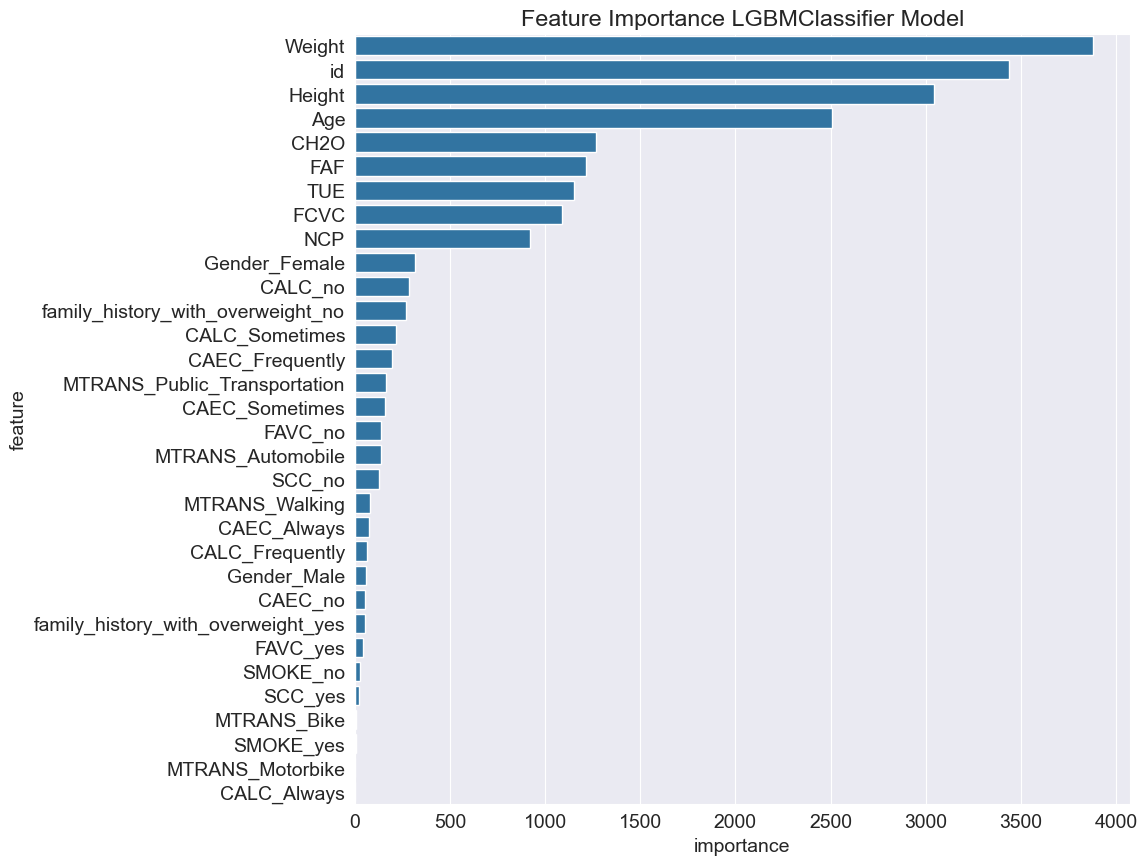

In [40]:
model = LGBMClassifier().fit(X_train,train_targets)
plot_importance_df('LGBMClassifier',model.feature_importances_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 31
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -1.954584
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -2.093921


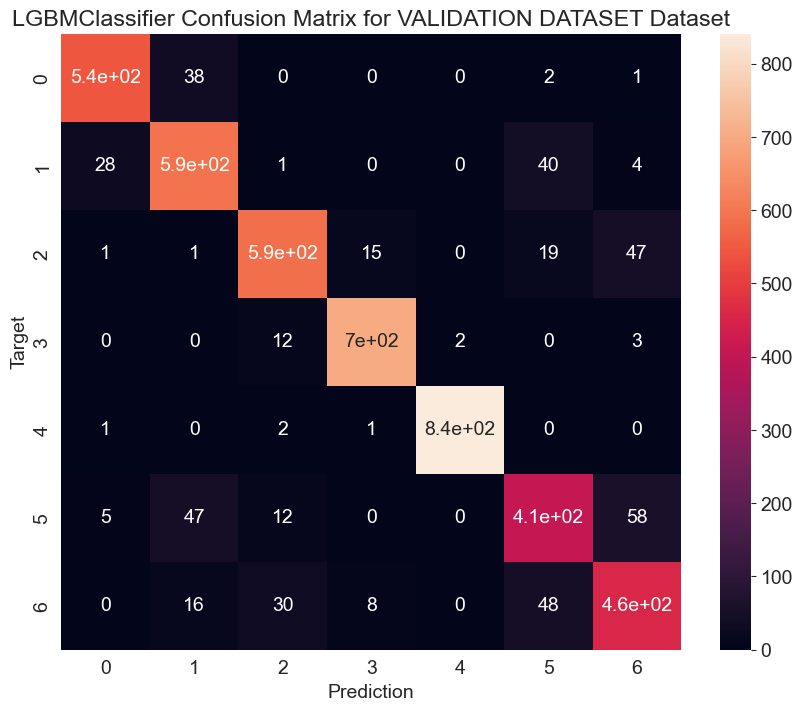

In [41]:
plot_confusion_matrix('LGBMClassifier',LGBMClassifier)

In [42]:
evalmodel(LGBMClassifier)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 31
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -1.954584
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -2.093921


{'train_score': '98.8%', 'val_score': '90.34%'}

## Model Hyper Parameter Tuning

In [87]:
lgbm_param = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.030962211546832760,
    'n_estimators': 500,
    'lambda_l1': 0.09667446568254372,
    'lambda_l2': 0.04018641437301800,
    'max_depth': 20,
    'colsample_bytree': 0.90977129346872643,
    'subsample': 0.09535797422450176,
    'min_child_samples': 26}

evalmodel(LGBMClassifier,**lgbm_param)

[LightGBM] [Warning] lambda_l1 is set=0.09667446568254372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09667446568254372
[LightGBM] [Warning] lambda_l2 is set=0.040186414373018, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040186414373018
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=0.09667446568254372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09667446568254372
[LightGBM] [Warning] lambda_l2 is set=0.040186414373018, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.040186414373018
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM]

{'train_score': '99.63%', 'val_score': '90.21%'}

## Trial#1
lgbm_param = {
    "objective": "multiclass",

    "metric": "multi_logloss",

    "verbosity": -1,

    "boosting_type": "gbdt",

    "random_state": 42,

    "num_class": 7,

    'learning_rate': 0.030962211546832760,

    'n_estimators': 500,

    'lambda_l1': 0.09667446568254372,

    'lambda_l2': 0.04018641437301800,

    'max_depth': 20,

    'colsample_bytree': 0.90977129346872643,

    'subsample': 0.09535797422450176,

    'min_child_samples': 26
    }

## Trial#1

lgbm_param = {
        "objective": "multiclass",

        "metric": "multi_logloss",

        "verbosity": -1,

        "boosting_type": "gbdt",
        
        'lambda_l1': 0.19497885440696502,

        'lambda_l2': 0.12207068813265183,

        'num_leaves': 58,

        'feature_fraction': 0.34161107651160905,

        'bagging_fraction': 0.82747031895665,

        'bagging_freq': 3,

        'min_child_samples': 18,

        'min_split_gain': 0.537049521093631,

        'n_estimators':568,

        'learning_rate': 0.028763470289377164
        
}

## Trial#3

lgbm_param = {
        "objective": "multiclass",

        "metric": "multi_logloss",

        "verbosity": -1,

        "boosting_type": "gbdt",

        "num_leaves": 58,
        "bagging_freq": 3,

        "n_estimators": 560,

        'max_depth': 2**58,
        'lambda_l1': 0.11769826398972967,

        'lambda_l2': 0.17410451412845834,

        'feature_fraction': 0.450260452035913,

        'bagging_fraction': 0.8162841917302569,
        'min_child_samples': 10,

        'min_split_gain': 0.4265016601910672,
        'learning_rate': 0.013496400290562705,
        
        'colsample_bytree ': 0.3346035325164147,    
}

In [135]:
import optuna
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
def objective(trial):

    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": 58,
        "bagging_freq": 3,
        "n_estimators": 560,
        'max_depth': 2**58,
        'learning_rate': 0.013496400290562705,
        "min_child_samples": 10,
        'min_child_weight':trial.suggest_float("lambda_l1", 1e-5,1e-2, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-1,0.3, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-1, 0.3, log=True),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.41, 0.61),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 0.8),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.4, 0.7, log=True),
        'colsample_bytree ': trial.suggest_float("colsample_bytree ", 0.2, 0.7, log=True),
    }
    model = LGBMClassifier(n_jobs=-1,**param).fit(X_train,train_targets)
    val_preds = model.predict(X_val)
    accuracy = accuracy_score(val_preds,val_targets)
    return accuracy

In [136]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=250)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
trial.params

[I 2024-04-22 19:25:42,962] A new study created in memory with name: no-name-f64ac532-d1d8-4eb3-9730-9360137db99b
[I 2024-04-22 19:25:49,227] Trial 0 finished with value: 0.9079580236117184 and parameters: {'lambda_l1': 0.0007787909212444625, 'lambda_l2': 0.14035577420248924, 'feature_fraction': 0.4555851255283334, 'bagging_fraction': 0.7774965129863348, 'min_split_gain': 0.6673562016794167, 'colsample_bytree ': 0.22609589511472775}. Best is trial 0 with value: 0.9079580236117184.
[I 2024-04-22 19:25:56,235] Trial 1 finished with value: 0.9057717533887188 and parameters: {'lambda_l1': 0.0009276384544080298, 'lambda_l2': 0.27314807865956214, 'feature_fraction': 0.5062696670870764, 'bagging_fraction': 0.6791386941525582, 'min_split_gain': 0.4249981006735214, 'colsample_bytree ': 0.5792677709761282}. Best is trial 0 with value: 0.9079580236117184.
[I 2024-04-22 19:26:02,173] Trial 2 finished with value: 0.9062090074333188 and parameters: {'lambda_l1': 0.001284464680555323, 'lambda_l2': 0.

Number of finished trials: 250
Best trial:
  Value: 0.910362920857018


{'lambda_l1': 1.4055336216494095e-05,
 'lambda_l2': 0.1158420150293298,
 'feature_fraction': 0.4233154483063078,
 'bagging_fraction': 0.769314036066136,
 'min_split_gain': 0.4327986229075345,
 'colsample_bytree ': 0.26943895523441097}

In [150]:
lgbm_param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": 58,
        "bagging_freq": 3,
        "n_estimators": 560,
        'max_depth': 2**58,
        'learning_rate': 0.013496400290562705,
        "min_child_samples": 10,
        'lambda_l1': 1.4055336216494095e-05,
        'lambda_l2': 0.1158420150293298,
        'feature_fraction': 0.4233154483063078,
        'bagging_fraction': 0.769314036066136,
        'min_split_gain': 0.4327986229075345,
        'colsample_bytree ': 0.26943895523441097,    
}
evalmodel(LGBMClassifier,**lgbm_param)

{'train_score': '97.86%', 'val_score': '91.04%'}

In [142]:
# fig = optuna.visualization.plot_optimization_history(study)
# fig.update_layout(width=1000,height=700)
# fig.show()

<img src='files\\Optimization Plots\\optimization_history_plot.png'>

In [143]:
# fig = optuna.visualization.plot_param_importances(study)
# fig.update_layout(width=900,height=600)
# fig.show()

<img src='files\\Optimization Plots\\hyperparamter_importance.png'>

In [145]:
# fig = optuna.visualization.plot_slice(study, params=[
#  'lambda_l1',
#  'lambda_l2',
#  'feature_fraction',
#  'bagging_fraction',
#  'min_split_gain',
#  'colsample_bytree '])
# fig.show()

<img src='files\\Optimization Plots\\slice_plot.png'>

## Final Model Training and Evaluation

In [148]:
model = LGBMClassifier(**lgbm_param)
model.fit(X_train,train_targets)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [154]:
print(f'Training Accuracy : {round(accuracy_score(train_preds,train_targets)*100,2)}%')
print(f'Validation Accuracy: {round(accuracy_score(val_preds,val_targets)*100,2)}%')

Training Accuracy : 97.86%
Validation Accuracy: 91.04%


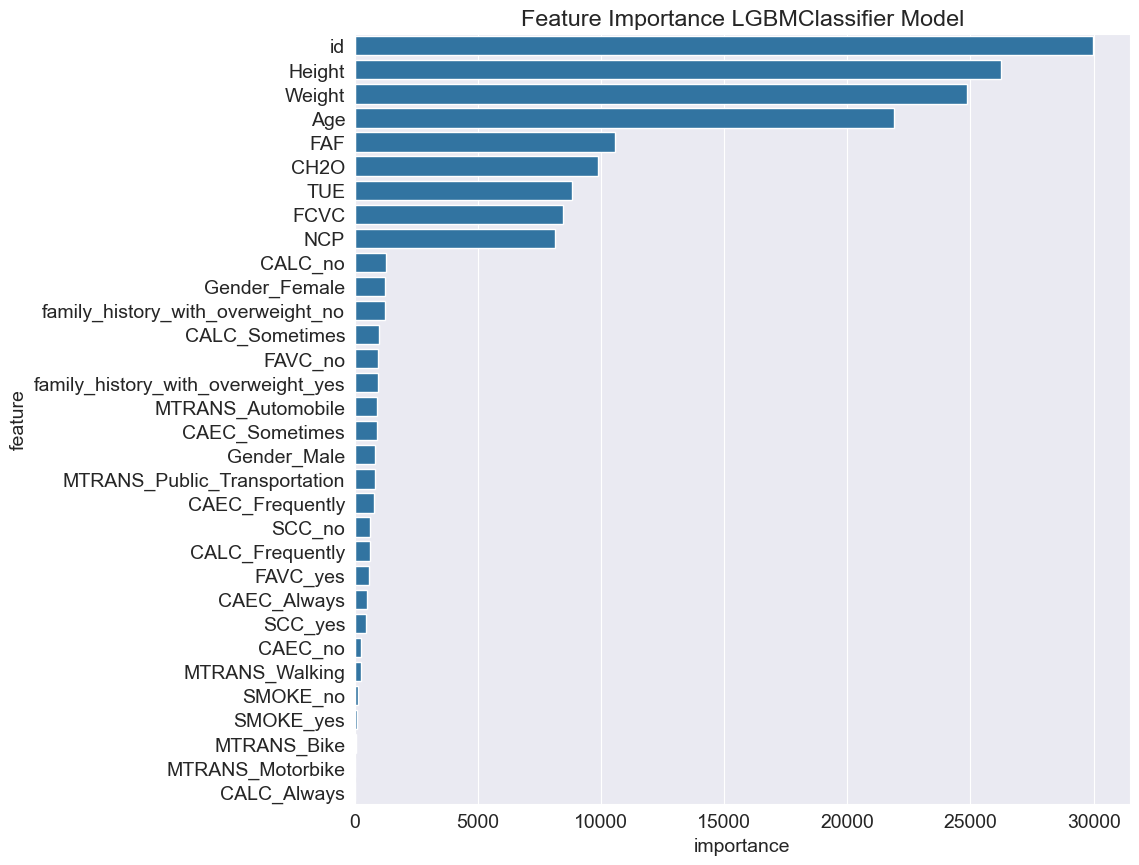

In [156]:
importance_df = pd.DataFrame({
            'feature': X_train.columns,
            'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
        
plt.figure(figsize=(10,10))
plt.title(f'Feature Importance LGBMClassifier Model')
sns.barplot(data=importance_df, x='importance', y='feature')
plt.show()

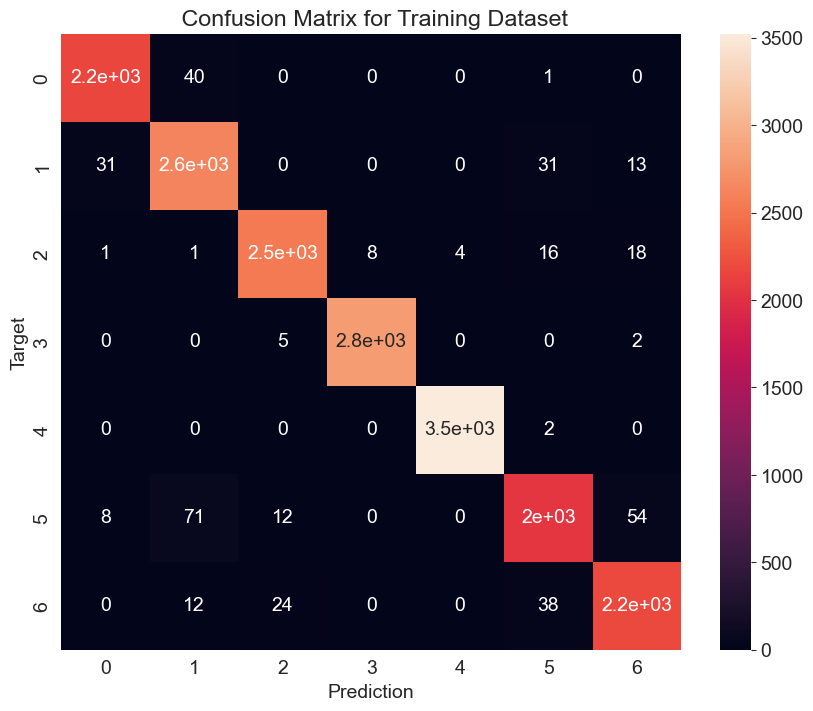

In [157]:
cf = confusion_matrix(train_targets, train_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cf , annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix for Training Dataset' ) 
plt.show()

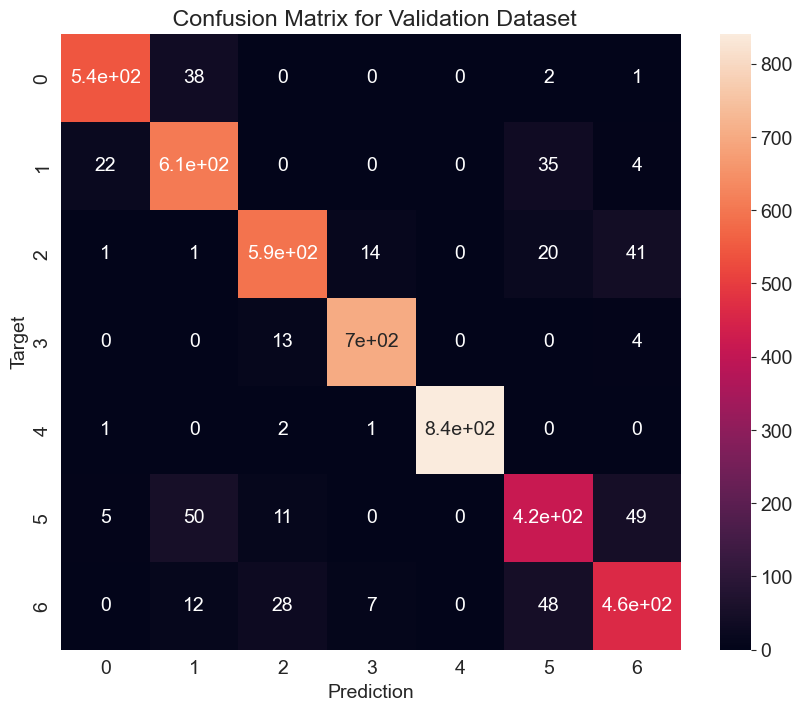

In [158]:
cf = confusion_matrix(val_targets, val_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cf , annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix for Validation Dataset' ) 
plt.show()

## xgboost

In [ ]:
xgb_params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 7,
    'eval_metric': 'merror',
    'n_estimators': 877,
    'min_split_loss': 0.02900462270069909,
    'learning_rate': 0.01334214976581785,
    'max_depth': 9,
    'subsample': 0.9013340059111625,
    'colsample_bytree': 0.3679195285250929,
    'min_child_weight': 10,
    'reg_lambda': 2.812190178346816e-07,
    'reg_alpha': 0.0011067714250979788
}

In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
xgbModel = XGBClassifier(**xgb_params)
xgbModel.fit(X_train,train_targets)

# Make predictions on the train set
y_pred_train = xgbModel.predict(X_train)
# Make predictions on the train set
y_pred_val = xgbModel.predict(X_val)
# Make predictions on the test set
y_pred_test = xgbModel.predict(X_test)
y_pred_test = labelencoder.inverse_transform(y_pred_test)

In [ ]:
accuracy_score(y_pred_train,train_targets)

0.963104673408035

In [ ]:
accuracy_score(y_pred_val,val_targets)

0.904897245299519

In [ ]:
sample_df['NObeyesdad'] = y_pred_test
sample_df.to_csv('files\\model3_submisson.csv' , index=False)